In [2]:
import cv2

In [17]:
filename = '../images/surname_tables/inangel.png'


Some notes from article
https://towardsdatascience.com/pre-processing-in-ocr-fc231c6035a7


In [18]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as im
from scipy.ndimage import interpolation as inter

img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
# convert to binary
wd, ht = img.shape
print(img.shape)
# pix = np.array(img.convert('1').getdata(), np.uint8)
bin_img = img
print(bin_img.shape)

def find_score(arr, angle):
    data = inter.rotate(arr, angle, reshape=False, order=0)
    hist = np.sum(data, axis=1)
    score = np.sum((hist[1:] - hist[:-1]) ** 2)
    return hist, score

delta = 1
limit = 5
angles = np.arange(-limit, limit+delta, delta)
scores = []
for angle in angles:
    hist, score = find_score(bin_img, angle)
    scores.append(score)
best_score = max(scores)
best_angle = angles[scores.index(best_score)]
print(f'Best angle: {best_angle}')


def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

img = cv2.imread(filename) 
img = rotate_image(img, best_angle)
cv2.line(img, (200, 0), (200, ht), (0,0,255), 3, cv2.LINE_AA)
cv2.imwrite("cdst2.jpg",img)

(2483, 1667)
(2483, 1667)
Best angle: 3


True

0


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f8220d6c2e8>)

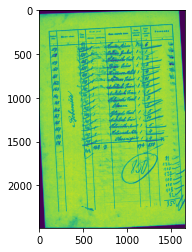

In [7]:
import numpy as np 
import cv2 
from matplotlib import pyplot as plt 
# Reading image from folder where it is stored 
print(cv2.IMREAD_GRAYSCALE)
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
cv2.imwrite("cdst2.jpg",img)
plt.subplot(122), plt.imshow(img) 

